**Importing the required packages**

In [ ]:
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

**Loading data set for exploratory data analysis**

In [ ]:
df = pd.read_csv('task_1/Task 1/XY_train.csv')

In [70]:
print(df.dtypes)

Shares                                float64
Comments added                        float64
Likes (vs. dislikes) (%)              float64
Views                                 float64
Subscribers                           float64
Impressions click-through rate (%)    float64
Average_view_duration_seconds           int64
dtype: object


In [66]:
df.describe()

,Shares,Comments added,Likes (vs. dislikes) (%),Views,Subscribers,Impressions click-through rate (%),Average_view_duration_seconds
count,429.000000,429.000000,429.000000,4.290000e+02,429.000000,429.000000,429.000000
mean,2972.510490,1814.564103,97.701166,3.463973e+06,8346.899767,5.590396,549.104895
std,7274.326258,1622.438045,0.907702,3.222874e+06,12810.100013,1.112541,142.429080
min,203.000000,187.000000,91.330000,1.033484e+06,341.000000,2.620000,218.000000
25%,900.000000,755.000000,97.340000,1.563399e+06,2117.000000,4.870000,443.000000
50%,1570.000000,1221.000000,97.880000,2.357541e+06,4216.000000,5.460000,553.000000
75%,2763.000000,2336.000000,98.280000,3.982387e+06,8505.000000,6.230000,642.000000
max,106414.000000,9109.000000,99.120000,2.803736e+07,120906.000000,10.420000,1088.000000


In [67]:
df.head()

,Shares,Comments added,Likes (vs. dislikes) (%),Views,Subscribers,Impressions click-through rate (%),Average_view_duration_seconds
0,2035.0,1578.0,97.95,4319500.0,3574.0,4.66,572
1,1070.0,1878.0,97.92,2522030.0,4845.0,5.14,638
2,1375.0,4314.0,97.54,3564849.0,8505.0,7.00,571
3,420.0,502.0,98.34,1148850.0,513.0,7.27,366
4,982.0,977.0,97.43,1559413.0,3865.0,5.08,452


**Visualising the data**

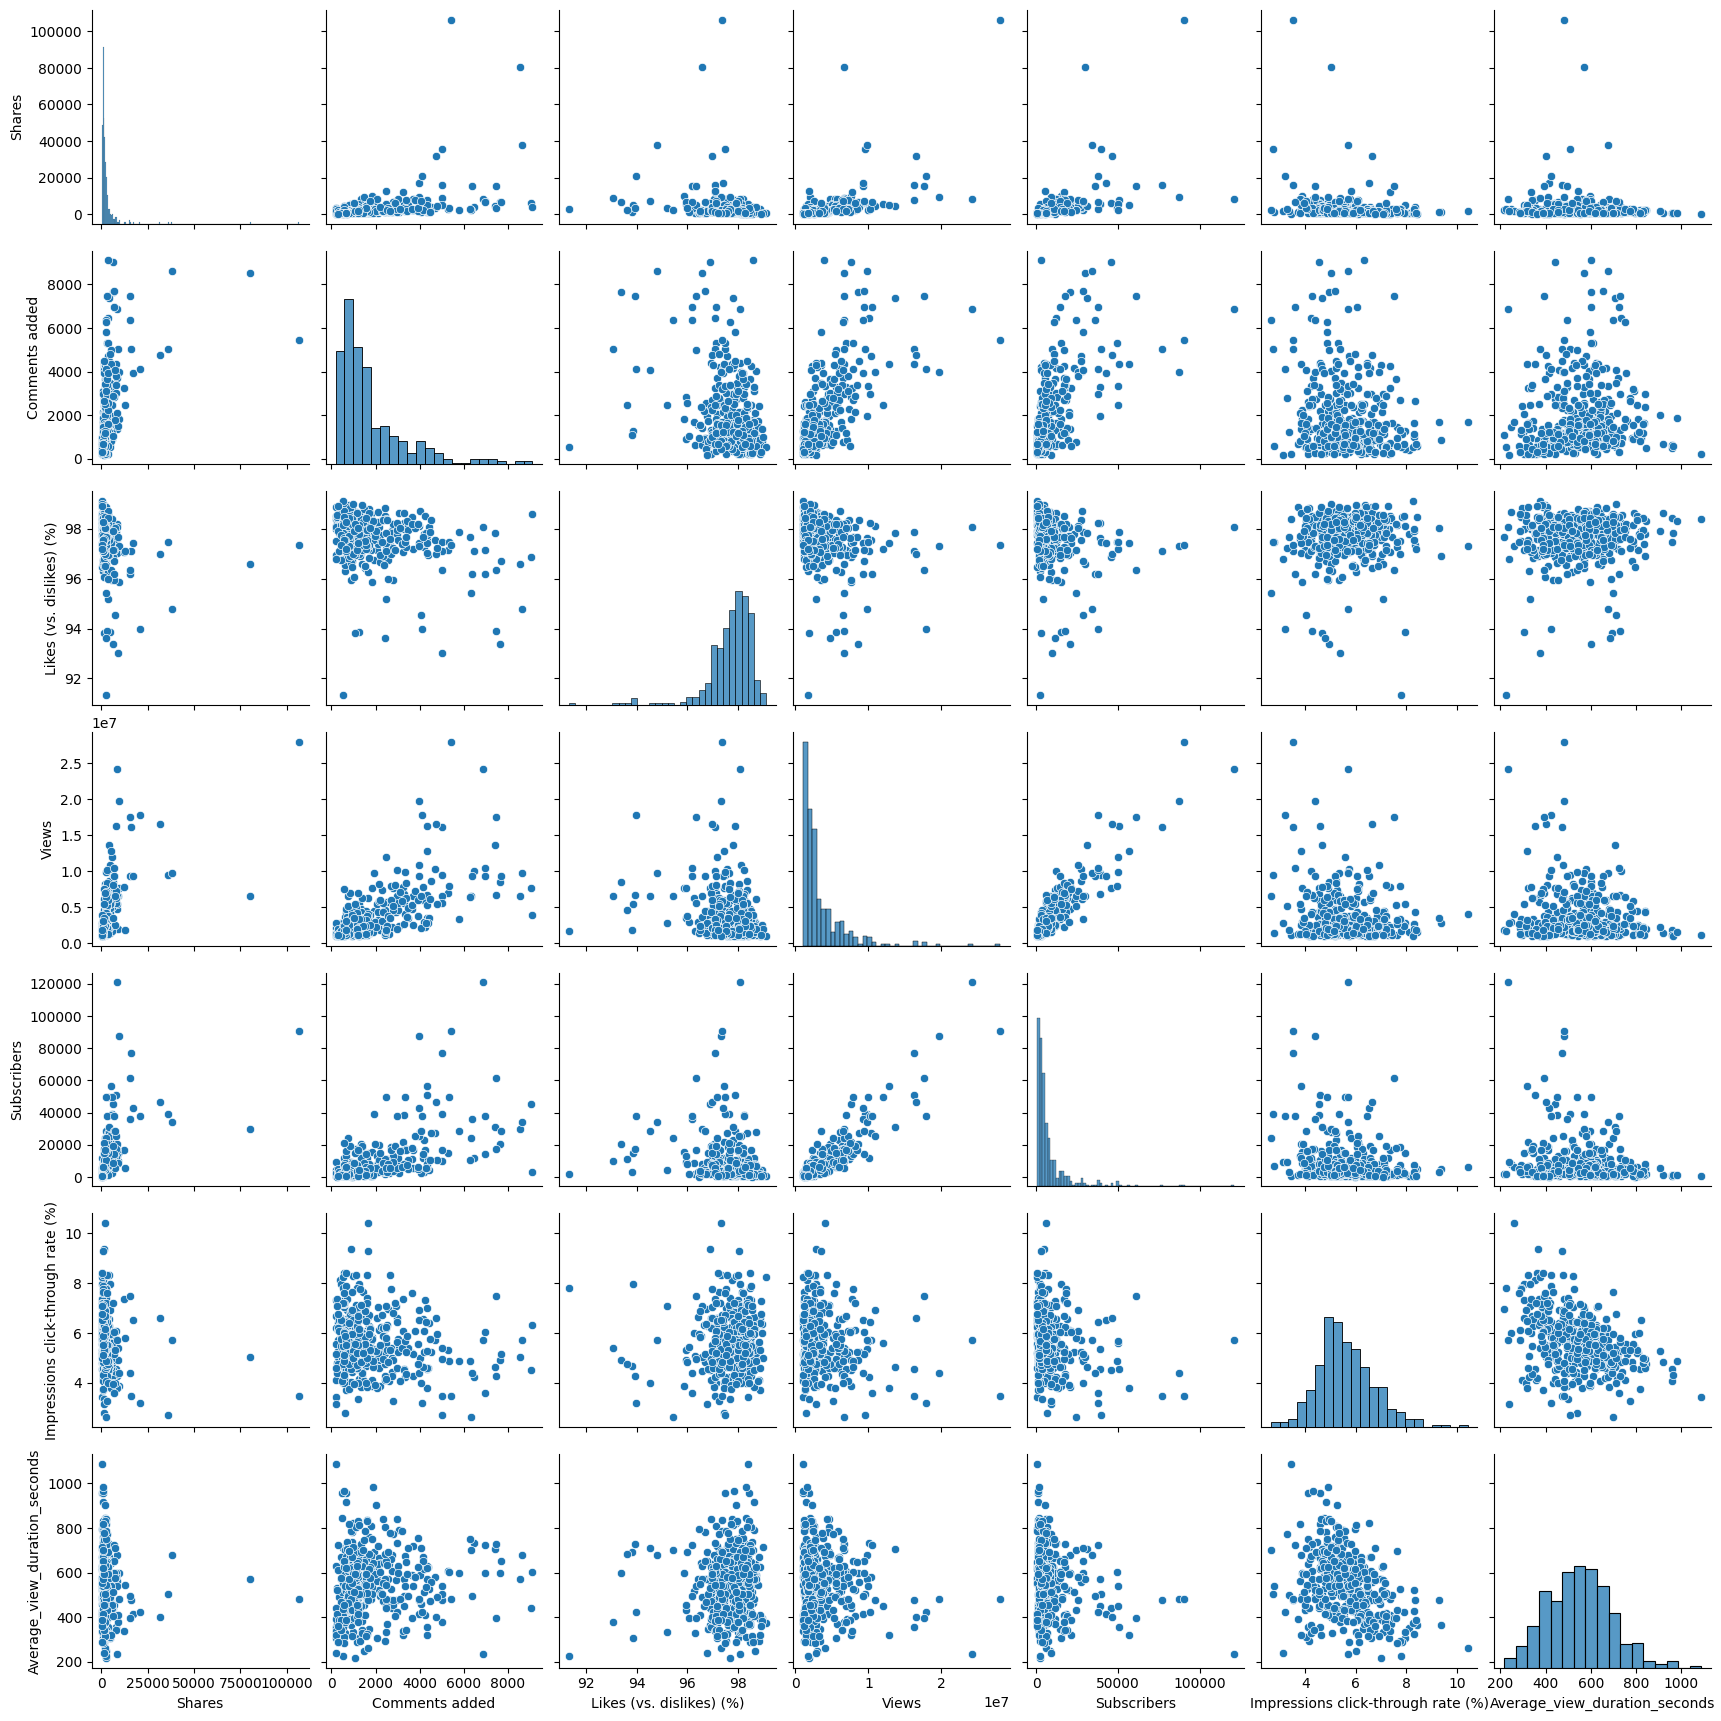

In [68]:
sns.pairplot(df, kind="scatter")
plt.show()

**It can be seen that some relationships are not distributed well, so given the scatter plots seen I decided to use (RFR)random forest regressor as it can be dificult to see non-linear data. RFR are designed to recognise feature importance so in this example video views.  They are also robust at overfitting conditions and are good at manging missing data situations.**

In [65]:
def time_to_seconds(time_str): # converting to a format machine learning can undertsand
    if isinstance(time_str, str):  
        try:
            time_obj = datetime.strptime(time_str, "%H:%M:%S")
            return time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second
        except ValueError:  
            return None  
    else:
        return None  


df.dropna(subset=['Views'], inplace=True)

df['Average_view_duration_seconds'] = df['Average view duration'].apply(time_to_seconds)

df = df.drop(columns=['Average view duration'])

print(df['Average_view_duration_seconds'].isnull().sum())

X = df.drop(columns=['Views'])
y = df['Views']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
r2_test = r2_score(y_test, y_test_pred)

print("Training Set Performance:")
print(f"MAE: {mae_train}")
print(f"RMSE: {rmse_train}")
print(f"R2: {r2_train}")

print("\nTest Set Performance:")
print(f"MAE: {mae_test}")
print(f"RMSE: {rmse_test}")
print(f"R2: {r2_test}")

X_test_data = pd.read_csv('task_1/Task 1/X_test.csv')

X_test_data = X_test_data.drop(columns=['Views prediction'], errors='ignore')  # Drop any mismatched columns

X_test_data['Average_view_duration_seconds'] = X_test_data['Average view duration'].apply(time_to_seconds)

X_test_data = X_test_data.drop(columns=['Average view duration'])

X_test_data_scaled = scaler.transform(X_test_data)

views_predictions = model.predict(X_test_data_scaled)

predictions_df = pd.DataFrame({'Predicted Views': views_predictions})
predictions_df.to_csv('views_predictions.csv', index=False)

print("\nPredictions for X_test.csv saved to 'views_predictions.csv'")


0
Training Set Performance:
MAE: 317744.53760932945
RMSE: 532061.9314956871
R2: 0.9694534662471315

Test Set Performance:
MAE: 990330.6626744184
RMSE: 1564274.991335527
R2: 0.8314494975594859

Predictions for X_test.csv saved to 'views_predictions.csv'


/home/dean/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/dean/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**The training set performance shows a very strong fit, with an R2 value of 0.969, indicating that 96.9% of the variance in the target variable (views) is explained by the model. The MAE and RMSE are reasonably low, suggesting that the predictions on the training set are close to the true values, though there is still room for improvement.  The R2 value of 0.831 indicates that 83.1% of the variance in the test set is explained by the model, which is still strong but less impressive than the training set. This drop suggests that the model might have overfitted to the training data.  The MAE and RMSE values are significantly higher in the test set compared to the training set, showing that the model's performance on unseen data is worse than on the training data.  In discussion a tool such as lazy regresssor could be used to check all model values to find a better fit or increasing the test size to 0.3/0.4**
